In [22]:
import pandas as pd
import io
import requests
from market_data import securities_prices
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

sns.set(style="darkgrid")

In [80]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
data = pd.read_csv('F-F_Research_Data_5_Factors_2x3.CSV', na_values='None',
                 parse_dates=['Date'], date_parser=dateparse,
                 index_col=0)
data['RF_lag'] = data['RF'].shift(-1)

In [54]:
data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1963-08-01,5.07,-0.79,1.67,0.39,-0.40,0.25
1963-09-01,-1.57,-0.48,0.18,-0.76,0.24,0.27
1963-10-01,2.53,-1.29,-0.10,2.75,-2.24,0.29
1963-11-01,-0.85,-0.84,1.71,-0.45,2.22,0.27


In [55]:
data.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2018-11-01,1.69,-0.81,0.20,-0.63,0.42,0.18
2018-12-01,-9.55,-3.00,-1.51,-0.27,0.10,0.19
2019-01-01,8.41,3.09,-0.60,-0.66,-1.46,0.21
2019-02-01,3.40,1.73,-2.84,0.26,-1.47,0.18
2019-03-01,1.10,-3.56,-4.08,0.91,-1.01,0.19


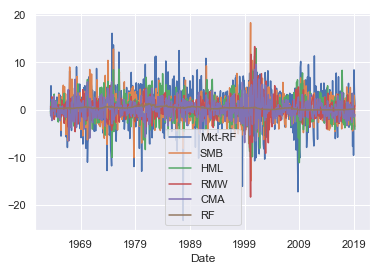

In [56]:
data.plot()

In [57]:
data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,0.529611,0.240030,0.311868,0.256831,0.274589,0.381241
std,4.392078,3.021003,2.801640,2.166562,1.997019,0.264593
min,-23.240000,-14.910000,-11.100000,-18.330000,-6.880000,0.000000
25%,-1.960000,-1.490000,-1.230000,-0.830000,-0.980000,0.180000
50%,0.870000,0.080000,0.230000,0.230000,0.140000,0.390000
75%,3.370000,2.070000,1.700000,1.290000,1.510000,0.520000
max,16.100000,18.320000,12.900000,13.310000,9.580000,1.350000


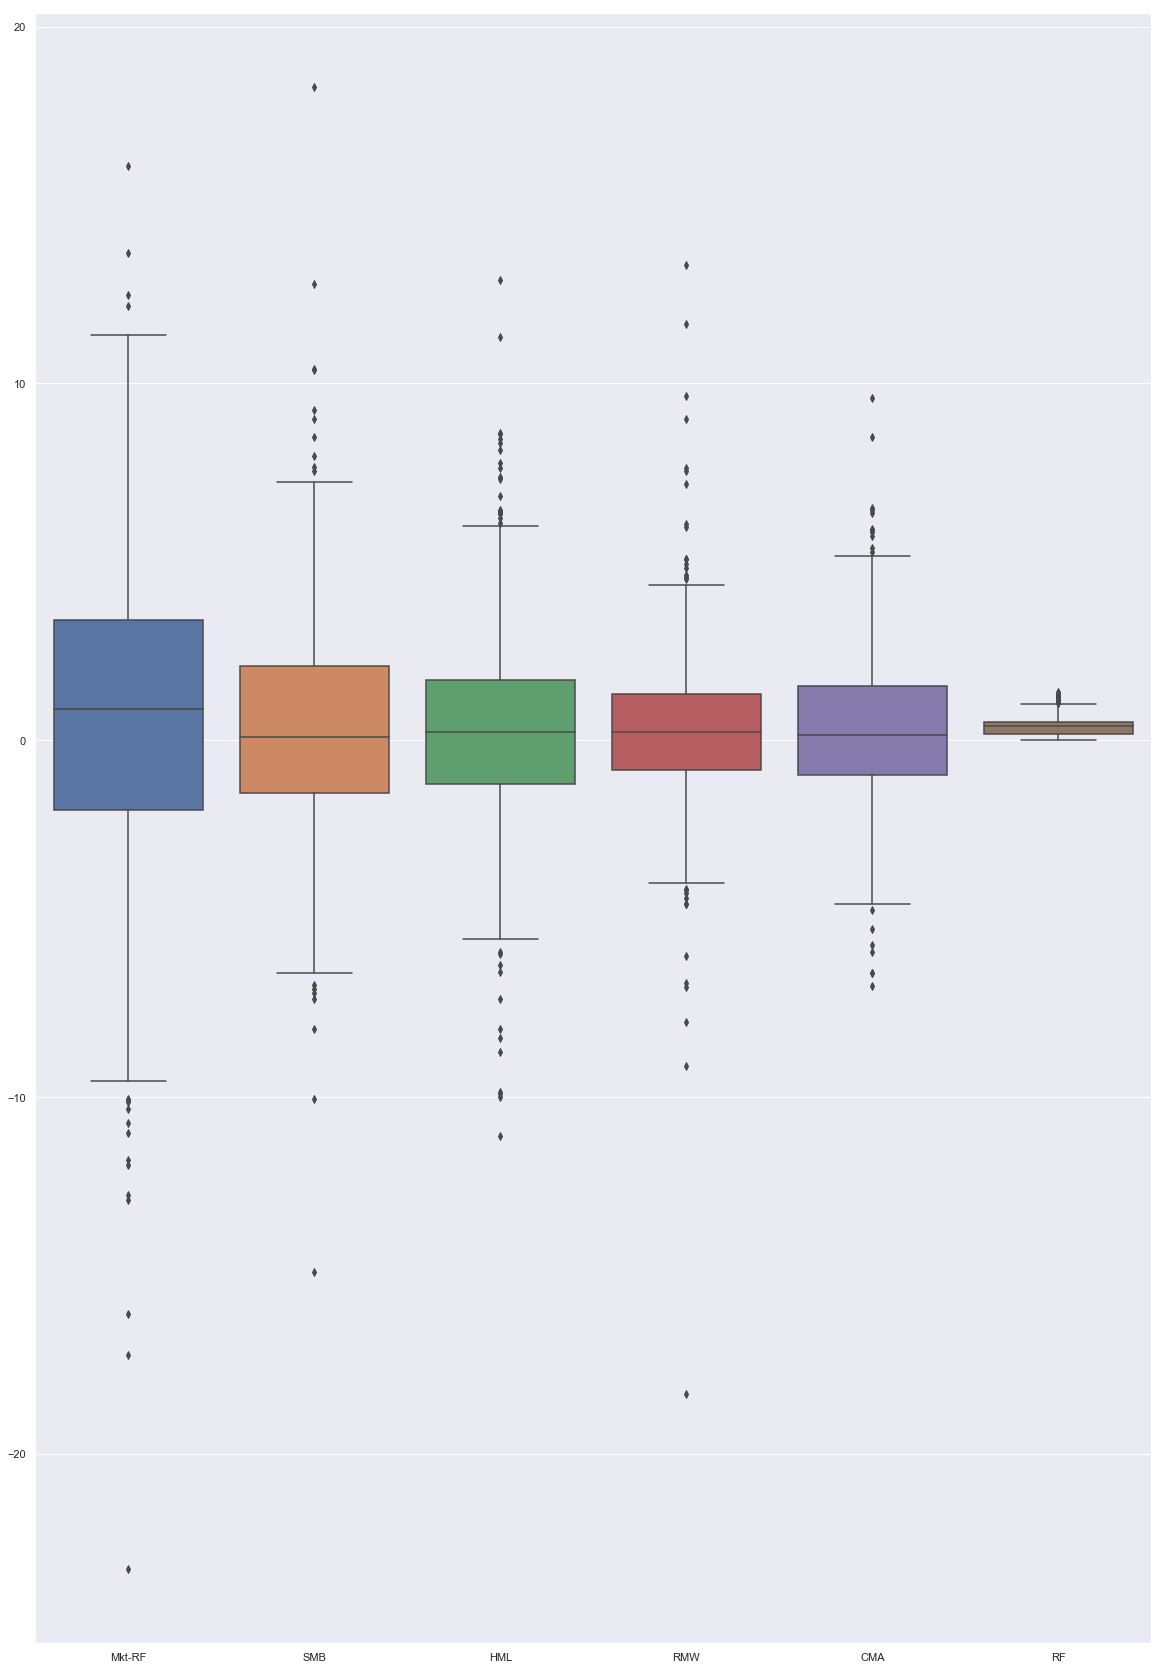

In [58]:
plt.figure(figsize=(20,30))
sns.boxplot(data=data)

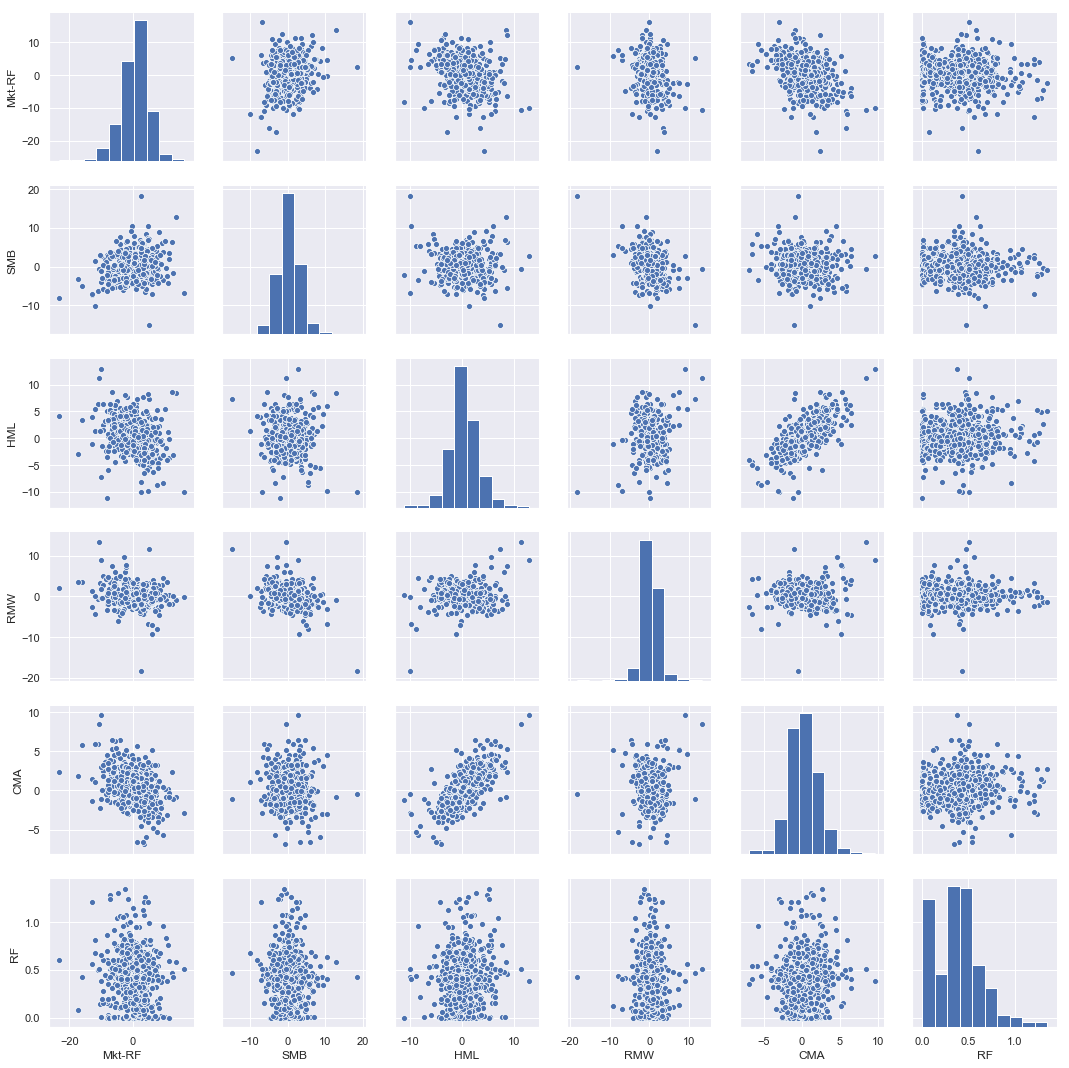

In [59]:
sns.pairplot(data);

In [60]:
# GET SECURITIES PRICES

In [61]:
price = securities_prices.price_data('BAC', col=['Close', 'Adj Close' ])
price_m = price.resample('M').first().tail(250)

[*********************100%***********************]  1 of 1 downloaded


In [62]:
price_m.index = [datetime.date(d.year, d.month, 1) for d in price_m.index]

In [63]:
price_m[['return', 'return_adj']] = price_m.pct_change() * 100

In [64]:
price_m[['return_lag', 'return_adj_lag']] = price_m[['return', 'return_adj']].shift(-1)

In [66]:
data.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF,RF_lag
Date,,,,,,,
2018-11-01,1.69,-0.81,0.20,-0.63,0.42,0.18,0.19
2018-12-01,-9.55,-3.00,-1.51,-0.27,0.10,0.19,0.21
2019-01-01,8.41,3.09,-0.60,-0.66,-1.46,0.21,0.18
2019-02-01,3.40,1.73,-2.84,0.26,-1.47,0.18,0.19
2019-03-01,1.10,-3.56,-4.08,0.91,-1.01,0.19,NaN


In [67]:
data = data.merge(price_m, left_index=True, right_index=True)

In [68]:
data['RP'] = data['return'] - data['RF']
data['RP_ADJ'] = data['return_adj'] - data['RF']
data['RP_LAG'] = data['return_lag'] - data['RF_lag']
data['RP_ADJ_LAG'] = data['return_adj_lag'] - data['RF_lag']

In [69]:
data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,RF_lag,Close,Adj Close,return,return_adj,return_lag,return_adj_lag,RP,RP_ADJ,RP_LAG,RP_ADJ_LAG
1998-08-01,-16.08,-5.01,3.41,3.48,5.84,0.43,0.46,39.43750,18.288866,NaN,NaN,-27.258320,-27.258366,NaN,NaN,-27.718320,-27.718366
1998-09-01,6.15,-0.82,-3.31,-1.52,-2.90,0.46,0.32,28.68750,13.303620,-27.258320,-27.258366,-6.427015,-5.170878,-27.718320,-27.718366,-6.747015,-5.490878
1998-10-01,7.13,-3.53,-2.20,0.59,0.27,0.32,0.31,26.84375,12.615706,-6.427015,-5.170878,8.963912,8.963898,-6.747015,-5.490878,8.653912,8.653898
1998-11-01,6.10,0.65,-3.14,-1.25,-1.15,0.31,0.38,29.25000,13.746565,8.963912,8.963898,11.217949,11.217973,8.653912,8.653898,10.837949,10.837973
1998-12-01,6.16,-1.50,-4.46,-0.75,-3.35,0.38,0.35,32.53125,15.288651,11.217949,11.217973,-7.012488,-5.708130,10.837949,10.837973,-7.362488,-6.058130


In [52]:
data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,RF_lag,Close,Adj Close,return,return_adj,return_lag,return_adj_lag,RP,RP_ADJ,RP_LAG,RP_ADJ_LAG
1998-08-01,-16.08,-5.01,3.41,3.48,5.84,0.43,0.46,39.43750,18.288866,NaN,NaN,-0.272583,-0.272584,NaN,NaN,-0.732583,-0.732584
1998-09-01,6.15,-0.82,-3.31,-1.52,-2.90,0.46,0.32,28.68750,13.303620,-0.272583,-0.272584,-0.064270,-0.051709,-0.732583,-0.732584,-0.384270,-0.371709
1998-10-01,7.13,-3.53,-2.20,0.59,0.27,0.32,0.31,26.84375,12.615706,-0.064270,-0.051709,0.089639,0.089639,-0.384270,-0.371709,-0.220361,-0.220361
1998-11-01,6.10,0.65,-3.14,-1.25,-1.15,0.31,0.38,29.25000,13.746565,0.089639,0.089639,0.112179,0.112180,-0.220361,-0.220361,-0.267821,-0.267820
1998-12-01,6.16,-1.50,-4.46,-0.75,-3.35,0.38,0.35,32.53125,15.288651,0.112179,0.112180,-0.070125,-0.057081,-0.267821,-0.267820,-0.420125,-0.407081


In [70]:
data.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'RF_lag', 'Close',
       'Adj Close', 'return', 'return_adj', 'return_lag', 'return_adj_lag',
       'RP', 'RP_ADJ', 'RP_LAG', 'RP_ADJ_LAG'],
      dtype='object')

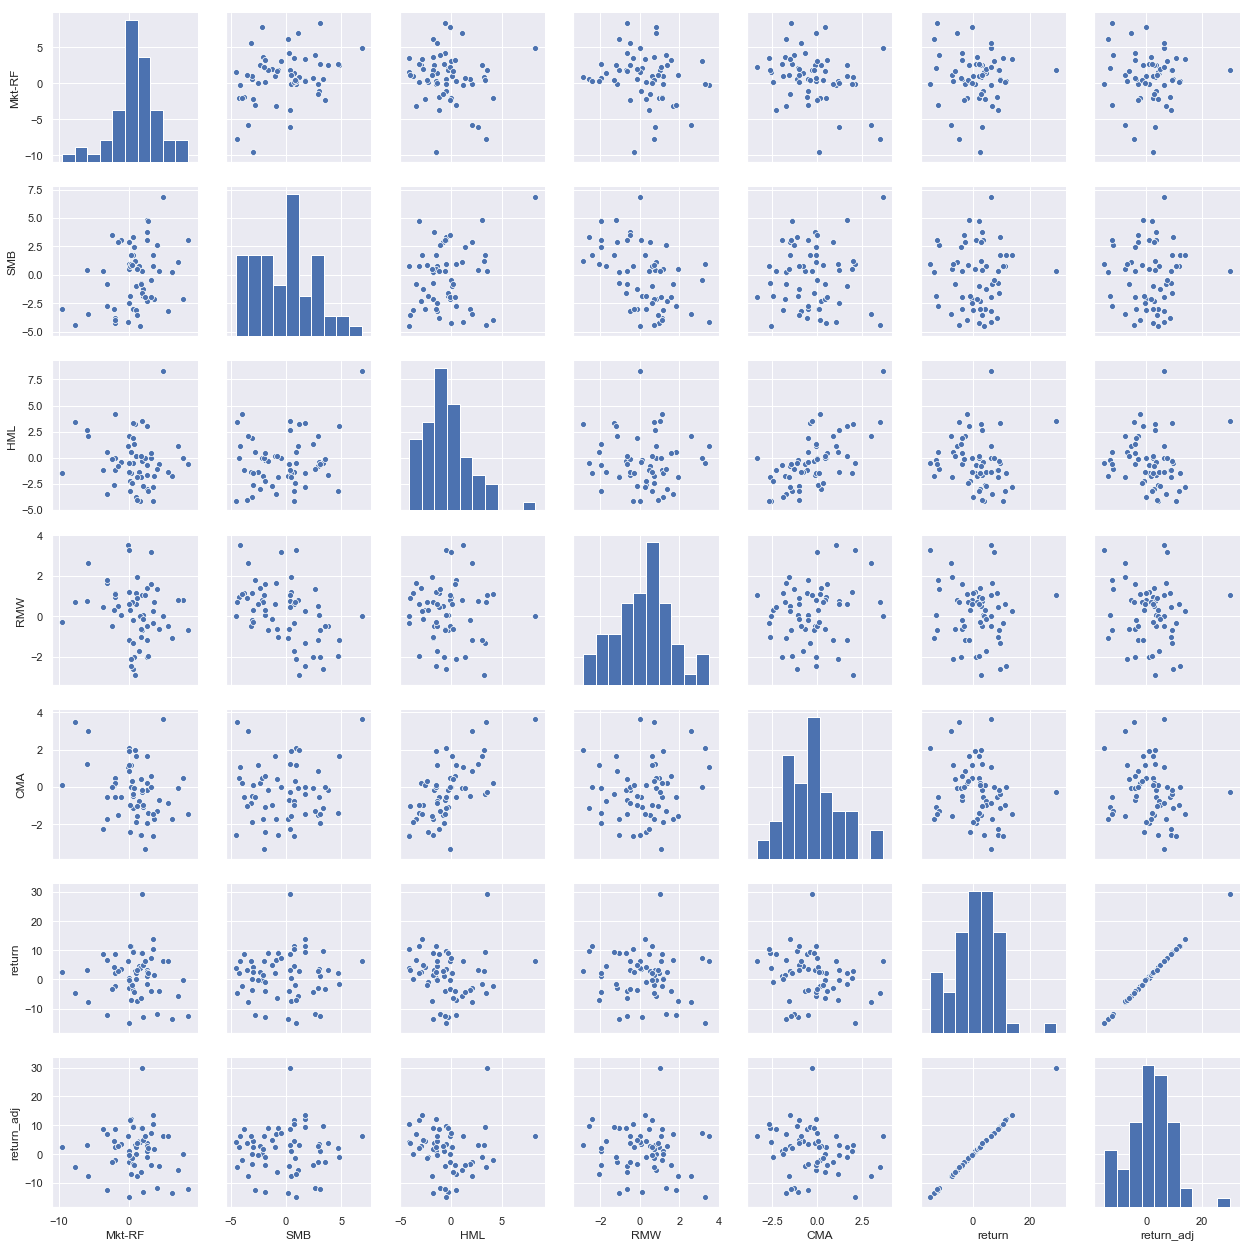

In [74]:
sns.pairplot(data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'return', 'return_adj']].dropna().tail(60));

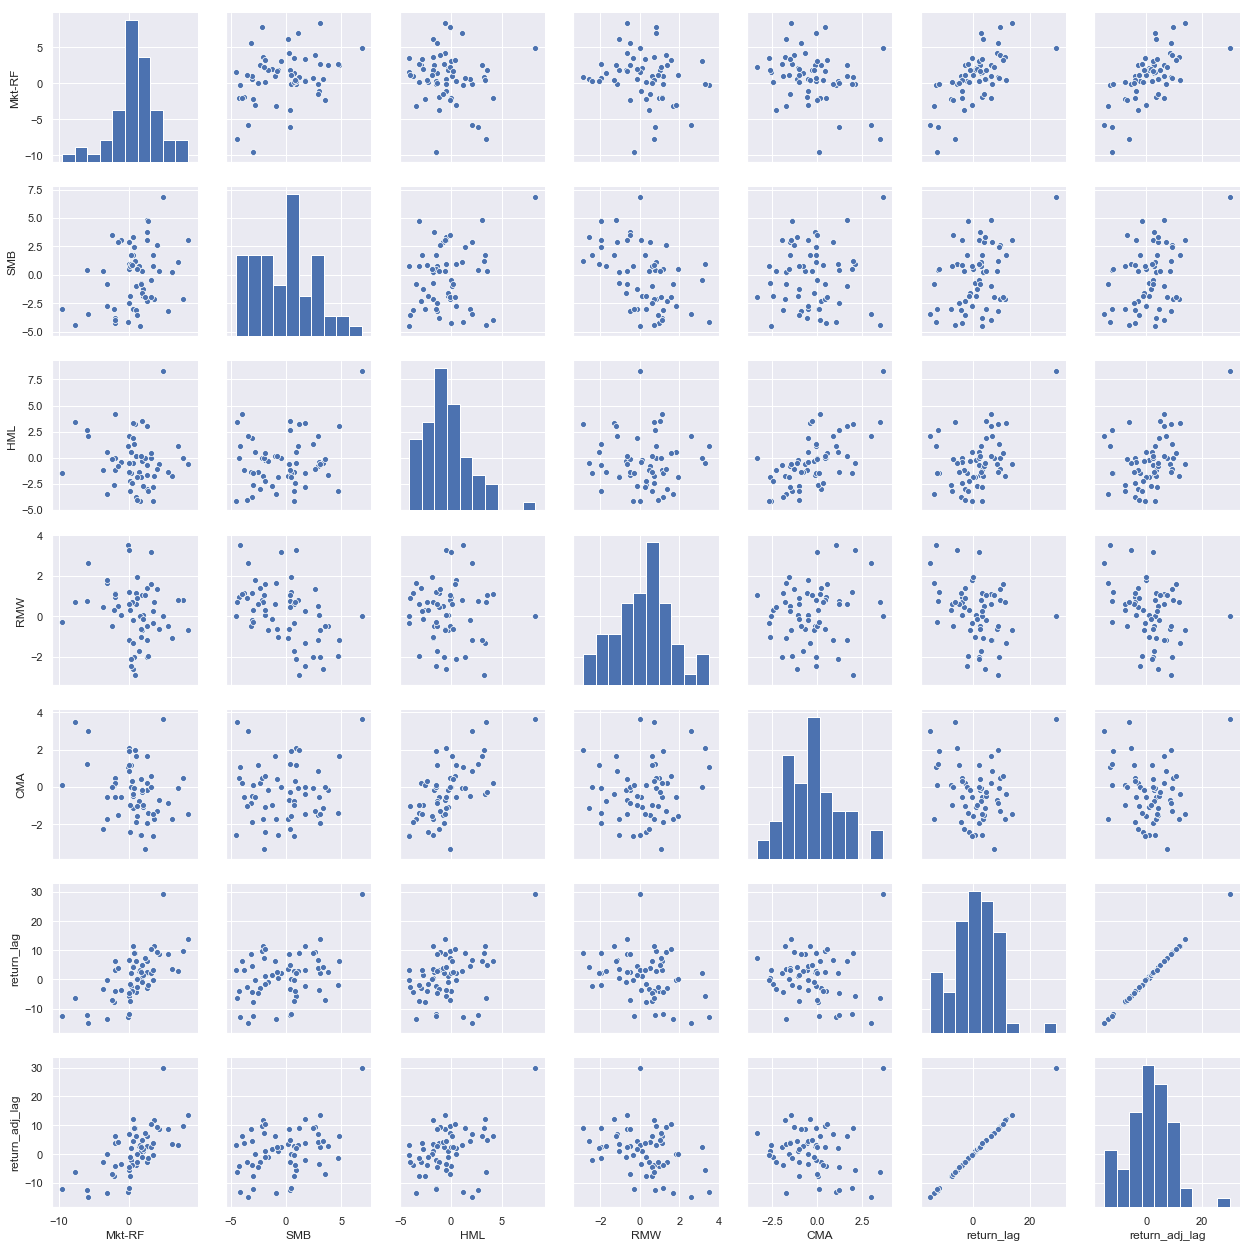

In [75]:
sns.pairplot(data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'return_lag', 'return_adj_lag']].dropna().tail(60));

In [97]:
tickers = [
    'JPM', 'GS', 'BAC', 'WFC', 'MS', 'C','BNY', 
    'AAPL', 'GOOGL', 'IBM', 'MSFT', 'ORCL', 'AMZN',
    'T', 'VZ', 'CAT', 'UAL', 'DAL', 'CSX',
    'XOM', 'CVX',
    'MCD', 'PEP', 'CLX', 'HD'
]

In [98]:
res = list()
for ticker in tickers:
    px = securities_prices.price_data(ticker, col=['Close', 'Adj Close' ])
    px_m = px.resample('M').first().tail(250)
    px_m.index = [datetime.date(d.year, d.month, 1) for d in px_m.index]
    px_m[['return', 'return_adj']] = px_m.pct_change() * 100
    px_m[['return_lag', 'return_adj_lag']] = px_m[['return', 'return_adj']].shift(-1)
    
    factor_data = data.merge(price_m, left_index=True, right_index=True)
    factor_data['ticker'] = ticker
    factor_data['RP'] = factor_data['return'] - factor_data['RF']
    factor_data['RP_ADJ'] = factor_data['return_adj'] - factor_data['RF']
    factor_data['RP_LAG'] = factor_data['return_lag'] - factor_data['RF_lag']
    factor_data['RP_ADJ_LAG'] = factor_data['return_adj_lag'] - factor_data['RF_lag']
    factor_data = factor_data.dropna()
    
    ff_cols = ['HML', 'Mkt-RF', 'RMW', 'CMA', 'SMB']
    factor_data_3m = factor_data[ff_cols].shift(3)
    factor_data_3m.columns = [col + '_3m' for col in ff_cols]
    
    factor_data_6m = factor_data[ff_cols].shift(6)
    factor_data_6m.columns = [col + '_6m' for col in ff_cols]
    
    factor_data_9m = factor_data[ff_cols].shift(9)
    factor_data_9m.columns = [col + '_9m' for col in ff_cols]
    
    factor_data_12m = factor_data[ff_cols].shift(12)
    factor_data_12m.columns = [col + '_12m' for col in ff_cols]
    
    ff_data = pd.concat([factor_data, factor_data_3m, factor_data_6m, factor_data_9m, factor_data_12m], axis=1)
    
    res += [ff_data]
    


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [99]:
ff_measures = pd.concat(res)

In [100]:
ff_measures.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,RF_lag,Close,Adj Close,return,...,HML_9m,Mkt-RF_9m,RMW_9m,CMA_9m,SMB_9m,HML_12m,Mkt-RF_12m,RMW_12m,CMA_12m,SMB_12m
1998-09-01,6.15,-0.82,-3.31,-1.52,-2.90,0.46,0.32,36.583332,19.642206,-26.649961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-10-01,7.13,-3.53,-2.20,0.59,0.27,0.32,0.31,27.145800,14.575031,-25.797355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01,6.10,0.65,-3.14,-1.25,-1.15,0.31,0.38,37.666668,20.495674,38.756891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-01,6.16,-1.50,-4.46,-0.75,-3.35,0.38,0.35,41.416668,22.536167,9.955752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-01,3.50,-0.75,-4.03,-2.69,-6.88,0.35,0.35,47.916668,26.272850,15.694164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
ff_measures.to_csv('ff_measures_2.csv')